<center><h1> <font color="green"><u>Active-Case Predictions ~ 19-nCoV</u></font> </h1></center>

<center><h3> <font color="#cc0000"><u>Active Cases(%) out of Confirmed</u></font> </h3></center>

<h3> <font color="purple"><u>This section includes:</u></font> </h3>

> * Data Filtering <br />
> * Training & Testing datasets <br />
> * Prediction <br />
> * Visualization (Scatter Plots) <br />

<br />

## Creating Datasets

In [1]:
# setting the working directory
setwd("~/Documents/A-tracking-of-2019-nCoV/COVID-19/ready_to_use")

In [2]:
# Loading desired libraries
library(readr)
library(ggplot2)
library(stringr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



<hr />

In [3]:
all = read_csv('COVID-19/Mixed/countryWise_bulk_summary.csv')
world = read_csv('COVID-19/World/World_dataset_dateWise_summary.csv')

hubei = read_csv('COVID-19/Hubei/Hubei_dataset_dateWise_summary.csv')
cruise = read_csv('COVID-19/Cruise/Diamond_Princess_dataset_dateWise_summary.csv')

Parsed with column specification:
cols(
  Country = col_character(),
  Day = col_double(),
  Date = col_character(),
  Confirmed = col_double(),
  Deaths = col_double(),
  Recovered = col_double(),
  Active.Cases = col_double(),
  Closed.Cases = col_double()
)

Parsed with column specification:
cols(
  Location = col_character(),
  Day = col_double(),
  Date = col_character(),
  Confirmed = col_double(),
  Deaths = col_double(),
  Recovered = col_double(),
  Active.Cases = col_double(),
  Closed.Cases = col_double()
)

Parsed with column specification:
cols(
  State = col_character(),
  Day = col_double(),
  Date = col_character(),
  Confirmed = col_double(),
  Deaths = col_double(),
  Recovered = col_double(),
  Active.Cases = col_double(),
  Closed.Cases = col_double()
)

Parsed with column specification:
cols(
  State = col_character(),
  Day = col_double(),
  Date = col_character(),
  Confirmed = col_double(),
  Deaths = col_double(),
  Recovered = col_double(),
  Active.Cases = co

In [4]:
# country list
countries = matrix(levels(as.factor(all$Country)))

#head(countries, 10)

<br /> 
### Choosing desired Country/Region

In [5]:
# country i.e. to be used throughout the analysis
 rName = 'China' # without hubei

# rName = 'World'
# rName = 'Hubei'
# rName = 'Diamond Cruise'

# whole_china --->  'China' + hubei

<hr />

In [6]:
# filtering out desired country
region = all[which(str_detect(all$Country, rName)),]

# region = world
# region = hubei
# region = cruise[14:nrow(cruise),]

head(region)

Country Day Date       Confirmed Deaths Recovered Active.Cases Closed.Cases
1 China   1   22-01-2020  104      0       0         104          0          
2 China   2   23-01-2020  199      1       2         196          3          
3 China   3   24-01-2020  371      2       5         364          7          
4 China   4   25-01-2020  645      2       7         636          9          
5 China   5   26-01-2020 1017      4       7        1006         11          
6 China   6   27-01-2020 1454      6      13        1435         19

<hr />

In [7]:
region=region[,c('Day','Confirmed','Active.Cases')]
head(region, 10)

Day Confirmed Active.Cases
1   1   104       104        
2   2   199       196        
3   3   371       364        
4   4   645       636        
5   5  1017      1006        
6   6  1454      1435        
7   7  1955      1928        
8   8  2533      2493        
9   9  3238      3184        
10 10  3996      3914

In [8]:
# calculate the percent (using Confirmed cases as total)
percent <- function(dfName){
    get(dfName) -> df
    part <- NULL
    
    for(i in 1:nrow(df)) {
        val = df[i,"Active.Cases"]
        Total = df[i,"Confirmed"]
        
        
        if(i == 1)
            if(val==0)
                part = 0
            else
                part = as.numeric((val*100)/Total)
        else
            if(val==0)
                part = c(part, 0)
            else
                part <- c(part, as.numeric((val*100)/Total))
    }
        
    return(part)
}

<hr />

In [9]:
# CASES -> percentage
region$'percent_active' = percent("region")     # Active cases, out of every 100 Confirmed cases
region$'percent_closed' = 100-percent("region") # Closed cases, out of every 100 Confirmed cases

In [10]:
head(region)

Day Confirmed Active.Cases percent_active percent_closed
1 1    104       104         100.00000      0.000000      
2 2    199       196          98.49246      1.507538      
3 3    371       364          98.11321      1.886792      
4 4    645       636          98.60465      1.395349      
5 5   1017      1006          98.91839      1.081613      
6 6   1454      1435          98.69326      1.306740

<br />* Dataset is ready

<hr /><br />

### Understanding the plot

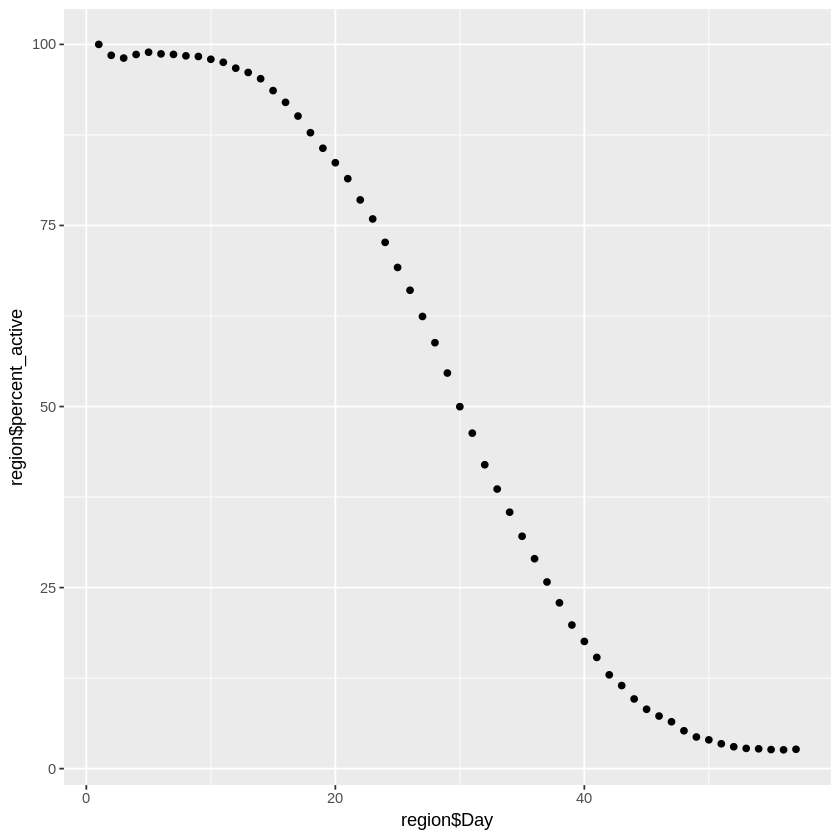

In [11]:
# Day vs %Closed Cases
region.scatter.plot <- ggplot(region, aes(x = region$Day, y = region$percent_active)) +
                        geom_point()
region.scatter.plot

In [12]:
tail(region)

Day Confirmed Active.Cases percent_active percent_closed
1 52  13159     398          3.024546       96.97545      
2 53  13187     369          2.798210       97.20179      
3 54  13209     362          2.740556       97.25944      
4 55  13235     349          2.636947       97.36305      
5 56  13259     345          2.602006       97.39799      
6 57  13303     356          2.676088       97.32391

<br /><hr /><br />

## Data-Analysis <br />

In [13]:
# loading plotting/machine learning
library(tidyverse)
library(caret)

# setting the theme
theme_set(theme_classic())

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ tibble  2.1.1     ✔ purrr   0.3.3
✔ tidyr   1.0.2     ✔ dplyr   0.8.3
✔ tibble  2.1.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [14]:
set.seed(20) # generages same set of random sample every time

training.samples <- region$Day %>%
  createDataPartition(p = 0.8, list = FALSE)

train.data  <- region[training.samples, ]
test.data <- region[-training.samples, ]

In [15]:
head(train.data, 3)
head(test.data, 3)

Day Confirmed Active.Cases percent_active percent_closed
1 1   104       104          100.00000      0.000000      
2 2   199       196           98.49246      1.507538      
3 3   371       364           98.11321      1.886792

Day Confirmed Active.Cases percent_active percent_closed
1  4   645       636         98.60465       1.395349      
2 13  6194      5954         96.12528       3.874717      
3 15  7775      7279         93.62058       6.379421

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



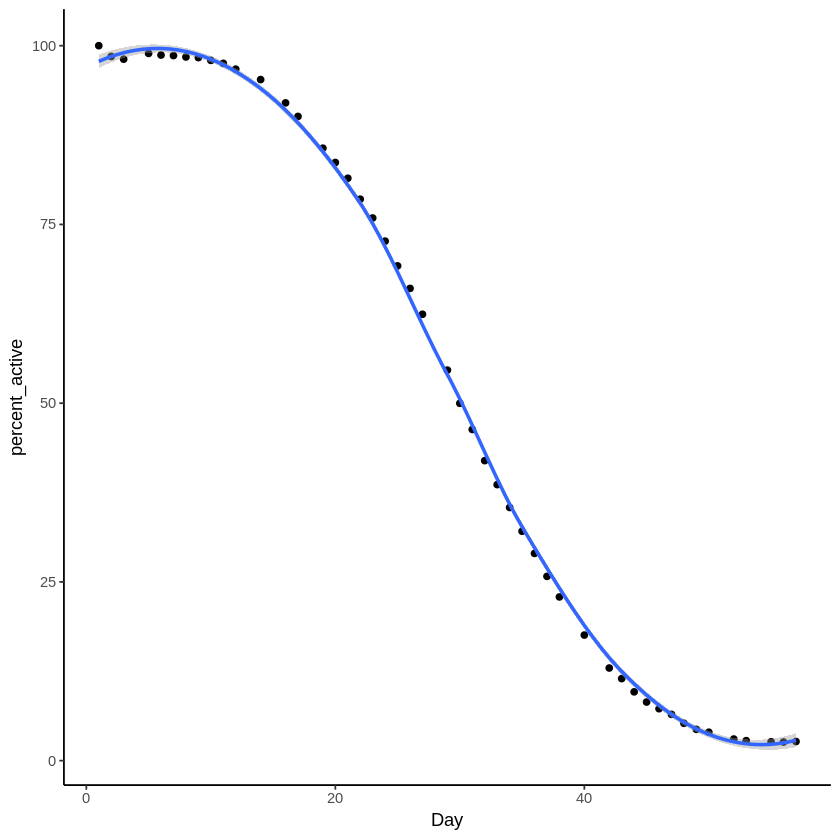

In [16]:
ggplot(train.data, aes(Day, percent_active) ) +
  geom_point() +
  stat_smooth()

<br /><hr /><br />

## Regrassion

1. ### Linear regression

In [58]:
# y = x
# Build the model

# pridiction by linear model
fit = lm(Day ~ percent_active, data = train.data)

In [59]:
# Predicting
predictions <- fit %>% predict(train.data)

In [60]:
# Model performance
data.frame(
  RMSE = RMSE(predictions, train.data$Day),
  R2 = R2(predictions, train.data$Day)
)

RMSE     R2       
1 3.532498 0.9534814

<br />

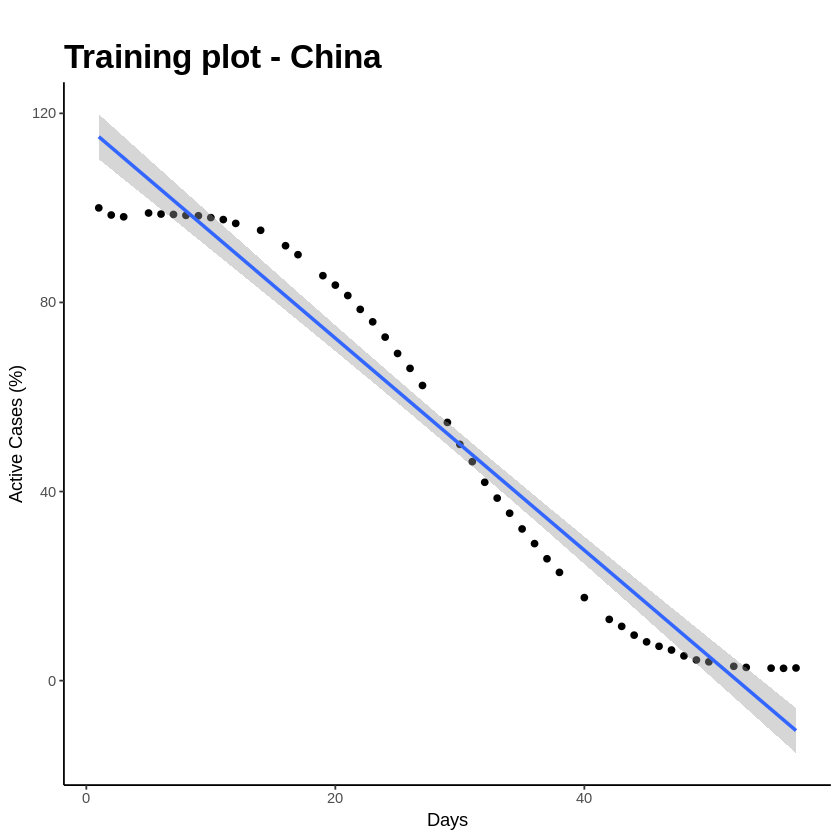

In [20]:
trainer <- ggplot(train.data, aes(Day, percent_active) ) +
              geom_point() +
              stat_smooth(method = lm, formula = y ~ x) +   # linear function
  
              # decoration
              labs( x = "Days", y = "Active Cases (%)", title = paste("\nTraining plot", rName, sep = " - ") ) +
              theme( plot.title = element_text(size = 20, face = "bold")) 
trainer

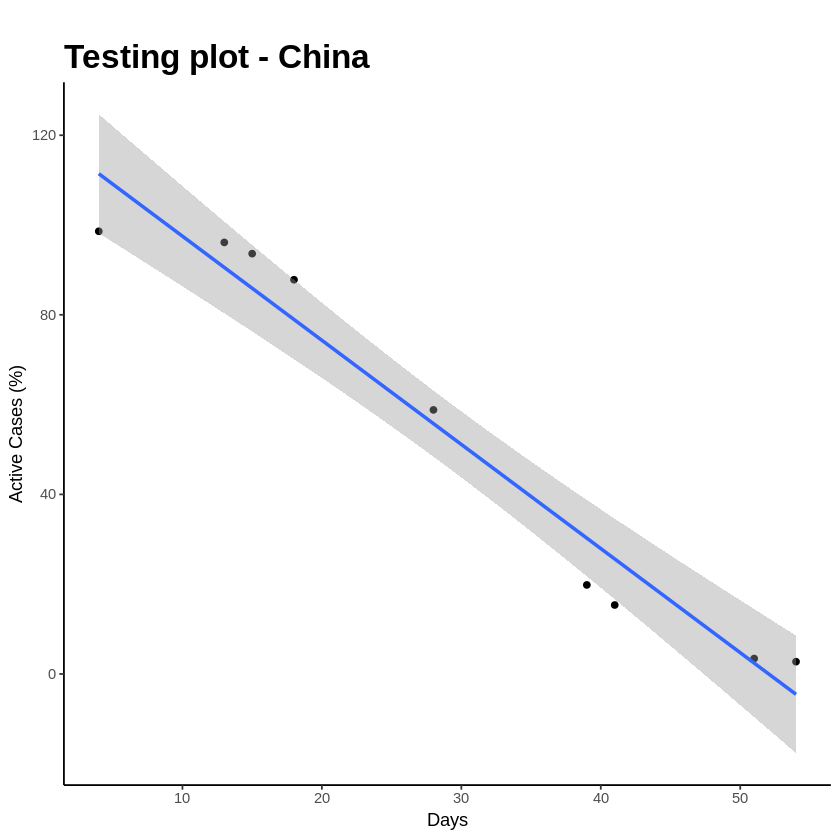

In [21]:
tester <- ggplot(test.data, aes(Day, percent_active) ) +
              geom_point() +
              stat_smooth(method = lm, formula = y ~ x) +   # linear function
  
              # decoration
              labs( x = "Days", y = "Active Cases (%)", title = paste("\nTesting plot", rName, sep = " - ") ) +
              theme( plot.title = element_text(size = 20, face = "bold")) 
tester

In [22]:

### can be TESTED in case of any problem in the ABOVE PLOT ###

#  # pridiction by linear model
#  pred <- predict(fit)   # fitting the model
#
#  plot(percent_active ~ Day, data = test.data)     #  "data = train.data"    is also possible
#  lines(train.data$Day, y=pred, col = "blue")


<br />

In [23]:
trained = cbind( # Prediction for training data
            train.data[,c("Day", "percent_active")],
            Pridicted_percent_active = predict(fit, train.data)
          )

tested = cbind(  # Prediction for tested data
            test.data[,c("Day", "percent_active")],
            Pridicted_percent_active = predict(fit, test.data)
         )


tail(trained, 10)
tail(tested, 10)

Day percent_active Pridicted_percent_active
39 46  7.264957       48.11743                
40 47  6.473010       48.45406                
41 48  5.229854       48.98247                
42 49  4.372667       49.34683                
43 50  3.977791       49.51468                
44 52  3.024546       49.91987                
45 53  2.798210       50.01607                
46 55  2.636947       50.08462                
47 56  2.602006       50.09947                
48 57  2.676088       50.06798

Day percent_active Pridicted_percent_active
1  4  98.604651       9.292483               
2 13  96.125283      10.346367               
3 15  93.620579      11.411019               
4 18  87.811406      13.880272               
5 28  58.815548      26.205282               
6 39  19.832552      42.775436               
7 41  15.361007      44.676116               
8 51   3.437001      49.744547               
9 54   2.740556      50.040579

<br />

2. ### Polynomial regression

In [61]:
# y = x + I(x^2)...   ---->   a polynomial function
deg = 16        # degree of polynomial

# better and alternate way for line i.e. above
model = lm(percent_active ~ poly(Day, deg, raw = TRUE), data = train.data)

In [62]:
#head(test.data)
#head(train.data)

In [63]:
predictions <- model %>% predict(train.data)

Warning message in predict.lm(., train.data):
“prediction from a rank-deficient fit may be misleading”


In [64]:
# Model performance
data.frame(
  RMSE = RMSE(predictions, train.data$Day),
  R2 = R2(predictions, train.data$Day)
)

RMSE     R2       
1 58.59968 0.9535058

<br /><br />

Warning message in predict.lm(model, newdata = data.frame(x = xseq), se.fit = se, :
“prediction from a rank-deficient fit may be misleading”


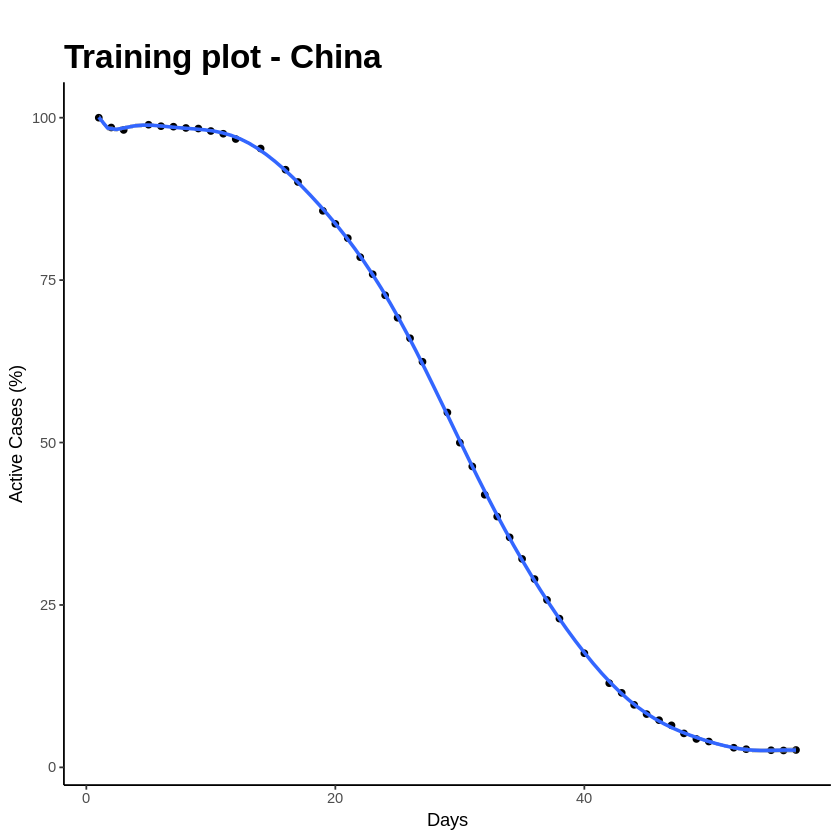

In [65]:
trainer <- ggplot(train.data, aes(Day, percent_active) ) +
              geom_point() +
              stat_smooth(method = lm, formula = y ~ poly(x, deg, raw = TRUE)) +   # polynomial function
  
              # decoration
              labs( x = "Days", y = "Active Cases (%)", title = paste("\nTraining plot", rName, sep = " - ") ) +
              theme( plot.title = element_text(size = 20, face = "bold")) 
trainer

Warning message in predict.lm(model, newdata = data.frame(x = xseq), se.fit = se, :
“prediction from a rank-deficient fit may be misleading”
Warning message in qt((1 - level)/2, df):
“NaNs produced”


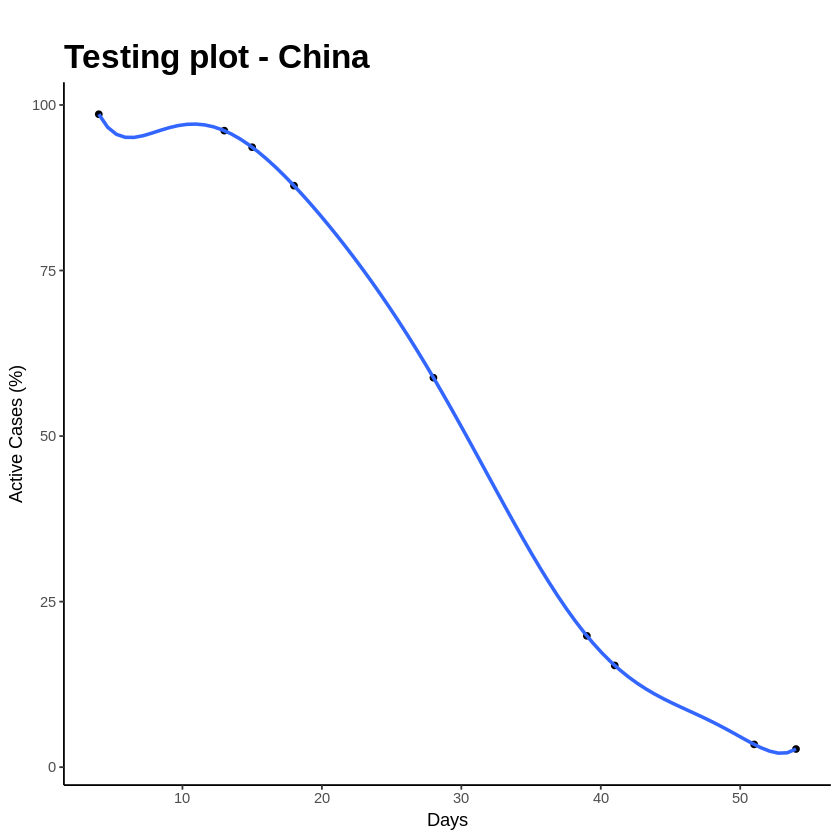

In [66]:
tester <- ggplot(test.data, aes(Day, percent_active) ) +
              geom_point() +
              stat_smooth(method = lm, formula = y ~ poly(x, deg, raw = TRUE)) +   # polynomial function
  
              # decoration
              labs( x = "Days", y = "Active Cases (%)", title = paste("\nTesting plot", rName, sep = " - ") ) +
              theme( plot.title = element_text(size = 20, face = "bold")) 
tester

In [67]:

### can be TESTED in case of any problem in the ABOVE PLOT ###

#  # pridiction by polynomial model
#  pred <- predict(model)   # fitting the model
#
#  plot(percent_active ~ Day, data = test.data)     #  "data = train.data"    is also possible
#  lines(train.data$Day, y=pred, col = "blue")


<br /><br />

In [68]:
trained = cbind( # Prediction for training data
            train.data[,c("Day", "percent_active")],
            Pridicted_percent_active = predict(model, train.data)
          )

tested = cbind(  # Prediction for tested data
            test.data[,c("Day", "percent_active")],
            Pridicted_percent_active = predict(model, test.data)
         )


tail(trained, 10)
tail(tested, 10)

Warning message in predict.lm(model, train.data):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, test.data):
“prediction from a rank-deficient fit may be misleading”


Day percent_active Pridicted_percent_active
39 46  7.264957       7.116415                
40 47  6.473010       6.135176                
41 48  5.229854       5.310308                
42 49  4.372667       4.602725                
43 50  3.977791       3.985590                
44 52  3.024546       3.026870                
45 53  2.798210       2.737020                
46 55  2.636947       2.609293                
47 56  2.602006       2.660969                
48 57  2.676088       2.655583

Day percent_active Pridicted_percent_active
1  4  98.604651      98.775524               
2 13  96.125283      96.135424               
3 15  93.620579      93.516263               
4 18  87.811406      88.056481               
5 28  58.815548      58.220623               
6 39  19.832552      20.180574               
7 41  15.361007      15.343639               
8 51   3.437001       3.453946               
9 54   2.740556       2.605630

<br /><hr /><br />

## Predictions

In [36]:
test_Miscellaneous = data.frame(
                        Day = NaN,
                        Confirmed = NaN,
                        Active.Cases = NaN,
                        percent_active = NaN,
                        percent_closed = NaN
                     )

In [37]:
# 13th March ---> day 52
dNo = 58    # get the day no. to pridict

test_Miscellaneous$'Day' = dNo

<br /> 
1. #### By Linear Model

In [40]:
# modeling variable  --->  fit
Prediction = cbind(
                test_Miscellaneous[,c("Day", "percent_active")],
                percent_pridicted = predict(fit, test_Miscellaneous)
             )
Prediction

Day percent_active percent_pridicted
1 58  NaN            NaN

<br /> 
2. #### By Polynomial Model

In [41]:
# modeling variable  --->  model
Prediction = cbind(
                test_Miscellaneous[,c("Day", "percent_active")],
                percent_pridicted = predict(model, test_Miscellaneous)
             )
Prediction

Warning message in predict.lm(model, test_Miscellaneous):
“prediction from a rank-deficient fit may be misleading”


Day percent_active percent_pridicted
1 58  NaN            2.674994

<hr /> <br />